In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read the train.csv file
df = pd.read_csv('data\imputed_data.csv')

# Display the first few rows of the dataframe
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,premium_bin
0,405250,22.0,Male,31380.333333,Married,2.0,PhD,Unemployed,47.451961,Urban,...,5.0,587.0,8.0,2020-08-27 15:21:39.259788,Poor,No,Daily,Condo,130.0,0.0
1,1089092,31.0,Female,5875.000000,Single,2.0,PhD,Employed,36.001744,Suburban,...,9.0,586.0,7.0,2020-02-29 15:21:39.252145,Poor,No,Weekly,Condo,3413.0,9.0
2,288099,53.0,Male,42157.000000,Divorced,2.0,Master's,Employed,22.430549,Suburban,...,12.0,499.0,3.0,2022-01-05 15:21:39.224915,Average,Yes,Rarely,Apartment,200.0,1.0
3,108872,60.0,Female,28892.000000,Divorced,3.0,High School,Unemployed,30.363379,Urban,...,17.0,846.0,8.0,2022-11-05 15:21:39.252145,Poor,Yes,Monthly,Condo,1361.0,7.0
4,1012092,57.0,Male,29768.000000,NaN,3.0,Bachelor's,NaN,9.653461,Suburban,...,19.0,552.0,6.0,2022-11-04 15:21:39.106582,Good,Yes,Rarely,Condo,923.0,5.0


In [3]:
df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,premium_bin
count,1.200000e+05,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,5.986494e+05,41.120725,32876.454147,2.010428,25.649458,0.993289,9.578417,593.495761,5.018242,1102.243400,4.494733
std,3.466331e+05,13.421687,31732.864811,1.372363,11.948914,0.875667,5.762226,144.293611,2.595101,864.526826,2.875739
min,7.000000e+00,18.000000,3.000000,0.000000,2.060176,0.000000,0.000000,300.000000,1.000000,20.000000,0.000000
25%,2.979295e+05,30.000000,8607.750000,1.000000,16.267364,0.000000,5.000000,477.000000,3.000000,514.000000,2.000000
50%,5.989775e+05,41.000000,24486.000000,2.000000,24.730522,1.000000,10.000000,597.000000,5.000000,872.000000,4.000000
75%,8.985700e+05,53.000000,44659.000000,3.000000,34.121220,1.333333,15.000000,711.000000,7.000000,1513.000000,7.000000
max,1.199988e+06,64.000000,149996.000000,4.000000,57.826803,8.000000,19.000000,849.000000,9.000000,4988.000000,9.000000


In [4]:
df = df.drop(columns=['premium_bin'])

In [5]:
imp_freq = SimpleImputer(strategy='most_frequent')
df[['Marital Status']] = imp_freq.fit_transform(df[['Marital Status']])

df[['Occupation']] = imp_freq.fit_transform(df[['Occupation']])

df[['Customer Feedback']] = imp_freq.fit_transform(df[['Customer Feedback']])


In [6]:
# Select the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical columns
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])

# Display the first few rows of the transformed dataframe
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,405250,22.0,1.0,31380.333333,1.0,2.0,3.0,2.0,47.451961,2.0,...,0.0,5.0,587.0,8.0,14645.0,2.0,0.0,0.0,1.0,130.0
1,1089092,31.0,0.0,5875.000000,2.0,2.0,3.0,0.0,36.001744,1.0,...,1.0,9.0,586.0,7.0,7593.0,2.0,0.0,3.0,1.0,3413.0
2,288099,53.0,1.0,42157.000000,0.0,2.0,2.0,0.0,22.430549,1.0,...,1.0,12.0,499.0,3.0,34188.0,0.0,1.0,2.0,0.0,200.0
3,108872,60.0,0.0,28892.000000,0.0,3.0,1.0,2.0,30.363379,2.0,...,1.0,17.0,846.0,8.0,46252.0,2.0,1.0,1.0,1.0,1361.0
4,1012092,57.0,1.0,29768.000000,2.0,3.0,0.0,1.0,9.653461,1.0,...,1.0,19.0,552.0,6.0,46183.0,1.0,1.0,2.0,1.0,923.0


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64


In [8]:
X = df.drop(columns=["Premium Amount"])  # Features
y = df["Premium Amount"]  # Target variable

In [9]:
X

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,405250,22.0,1.0,31380.333333,1.0,2.0,3.0,2.0,47.451961,2.0,2.0,0.000000,5.0,587.0,8.0,14645.0,2.0,0.0,0.0,1.0
1,1089092,31.0,0.0,5875.000000,2.0,2.0,3.0,0.0,36.001744,1.0,2.0,1.000000,9.0,586.0,7.0,7593.0,2.0,0.0,3.0,1.0
2,288099,53.0,1.0,42157.000000,0.0,2.0,2.0,0.0,22.430549,1.0,0.0,1.000000,12.0,499.0,3.0,34188.0,0.0,1.0,2.0,0.0
3,108872,60.0,0.0,28892.000000,0.0,3.0,1.0,2.0,30.363379,2.0,0.0,1.000000,17.0,846.0,8.0,46252.0,2.0,1.0,1.0,1.0
4,1012092,57.0,1.0,29768.000000,2.0,3.0,0.0,1.0,9.653461,1.0,0.0,1.000000,19.0,552.0,6.0,46183.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,467234,60.0,1.0,14862.000000,2.0,2.0,0.0,1.0,20.390235,0.0,0.0,0.333333,18.0,772.0,8.0,37723.0,1.0,0.0,3.0,2.0
119996,154082,54.0,0.0,2439.000000,0.0,3.0,1.0,1.0,13.702759,2.0,0.0,2.000000,0.0,713.0,5.0,15898.0,2.0,0.0,1.0,0.0
119997,218472,27.0,0.0,4847.000000,2.0,4.0,3.0,0.0,23.278419,2.0,0.0,3.000000,9.0,460.0,9.0,43492.0,2.0,1.0,3.0,2.0
119998,817339,19.0,1.0,15881.000000,2.0,2.0,2.0,2.0,17.895116,0.0,2.0,0.000000,2.0,609.0,1.0,41731.0,2.0,0.0,3.0,0.0


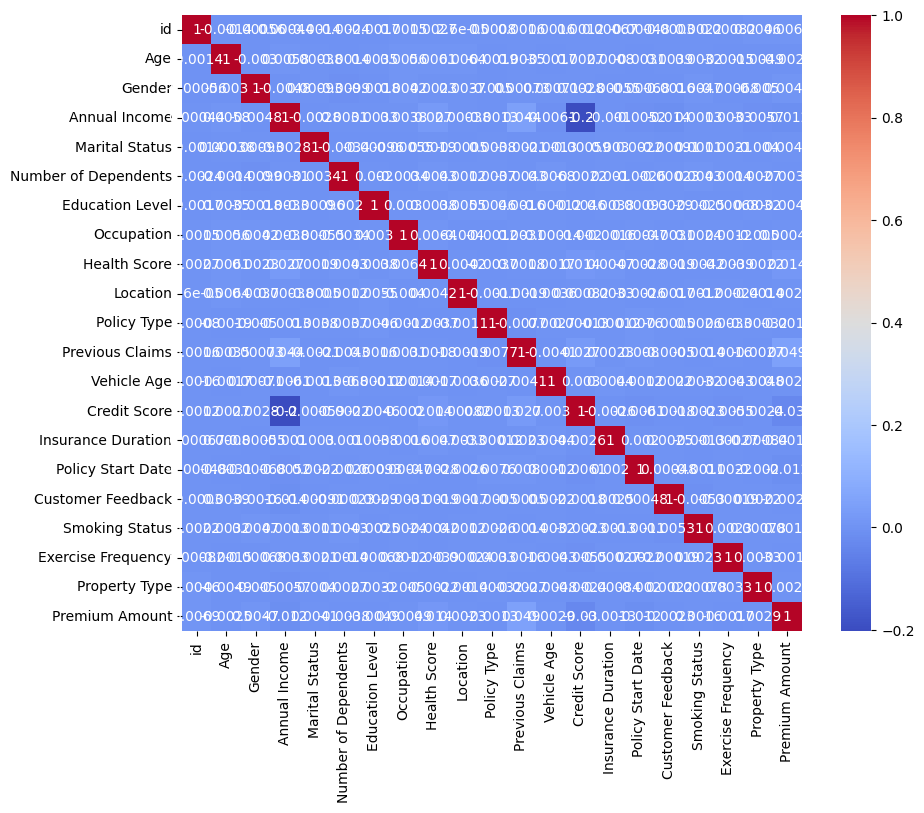

In [19]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Apply PCA
pca = PCA(n_components=18)  # Adjust n_components to the desired number of principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [36]:
# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)

# Fit the model on the training data
xg_reg.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = xg_reg.predict(X_test_pca)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 749500.4516149127


In [37]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: -0.0008079279223491831


In [43]:
test = X_test_pca[1]
test_original_space = pca.inverse_transform(test.reshape(1, -1))
scaler.inverse_transform(test_original_space)

array([[ 5.66854384e+05,  3.33691384e+01,  4.05479275e-01,
         6.51079531e+04,  1.82534456e+00,  3.53598879e+00,
         3.27882715e+00,  1.62744222e+00,  1.44446358e+01,
         3.69560194e-01, -1.37559547e-01,  8.16791941e-01,
         8.17877509e+00,  4.37192123e+02,  5.10101419e+00,
         4.28151747e+03, -1.73254817e-01,  9.25686860e-01,
         2.46623601e-01,  9.08260673e-02]])

In [45]:
# Transform test_original_space back to PCA space
test_pca_space = pca.transform(scaler.transform(test_original_space))

# Make prediction
y_pred_test = xg_reg.predict(test_pca_space)

d:\SMK\Machine Learning\Projects\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
y_pred_test

array([1189.0426], dtype=float32)

: 